<a href="https://colab.research.google.com/github/sarahlai30/Machine-Learning-INDE-577/blob/main/Unsupervised%20Learning/Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis

### The Curse of Dimensionality

The curse of dimensionality refers to the challenges that arise when working with high-dimensional data, where the number of features increases exponentially. This can lead to issues like overfitting, longer computation times, and reduced model accuracy. With more dimensions, it becomes harder to obtain a representative sample, making tasks like clustering or classification computationally expensive and complex.

To overcome this, techniques like feature selection and dimensionality reduction are used. Dimensionality reduction simplifies the dataset by reducing the number of features while preserving as much relevant information as possible, improving efficiency and accuracy.

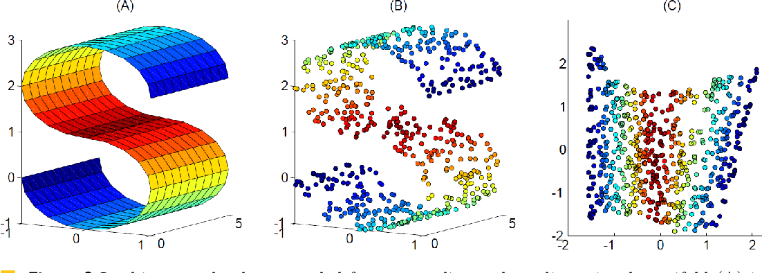

We will be covering one of the most popular dimensionality techniques in this notebook, **Principal Component Analysis**.

Principal Component Analysis (PCA) is an unsupervised technique used to reduce the dimensionality of a dataset while preserving its most important patterns. It transforms the data into a new set of variables, called principal components, which are linear combinations of the original features. These components are ordered by how much variance (information) they capture, with the first component capturing the most.

PCA is commonly used for:

1. Data Visualization: Reducing high-dimensional data to 2D or 3D for easier interpretation.
2. Feature Selection: Identifying the most important variables in a dataset.
3. Data Compression: Reducing dataset size without losing critical information.

PCA assumes that features with higher variance carry more information and organizes components to capture as much variance as possible while maintaining orthogonality between them.

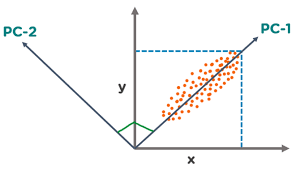

We will be demonstrating PCA on the Wine Dataset.

The following code block manually performs PCA.

1. Scale the data.
2. Compute the covariance matrix in order to find directions (principal components) that capture the maximum variance.
3. Find the eigenvalues to indicate the amount of variance captured by each principal component and eigenvectors to define the directions of the principal components.
4. Sort the eigenvalues and eigenvectors by how much variance they capture to ensure the first components are the most informative.
5. Select the top 2 eigenvectors corresponding to the largest eigenvalues.

Finally, project the original data onto the top 2 principal components by multiplying the standardized data with the selected eigenvectors. This transforms the dataset into a lower-dimensional space while preserving as much variance as possible.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
import pandas as pd

data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
labels = data.target_names

In [ ]:
# Scale the data
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Covariance Matrix
cov_matrix = np.cov(scaled_X.T)

# Compute Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort Eigenvalues and Eigenvectors in Descending Order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Select the Top Principal Components
n = 2  # Select the number of components you want to keep
selected_eigenvectors = eigenvectors[:, :n]

# Transform Data
pca_transformed_data = np.dot(scaled_X, selected_eigenvectors)

pca_df = pd.DataFrame(pca_transformed_data, columns=["PC1", "PC2"])
pca_df["Class"] = y

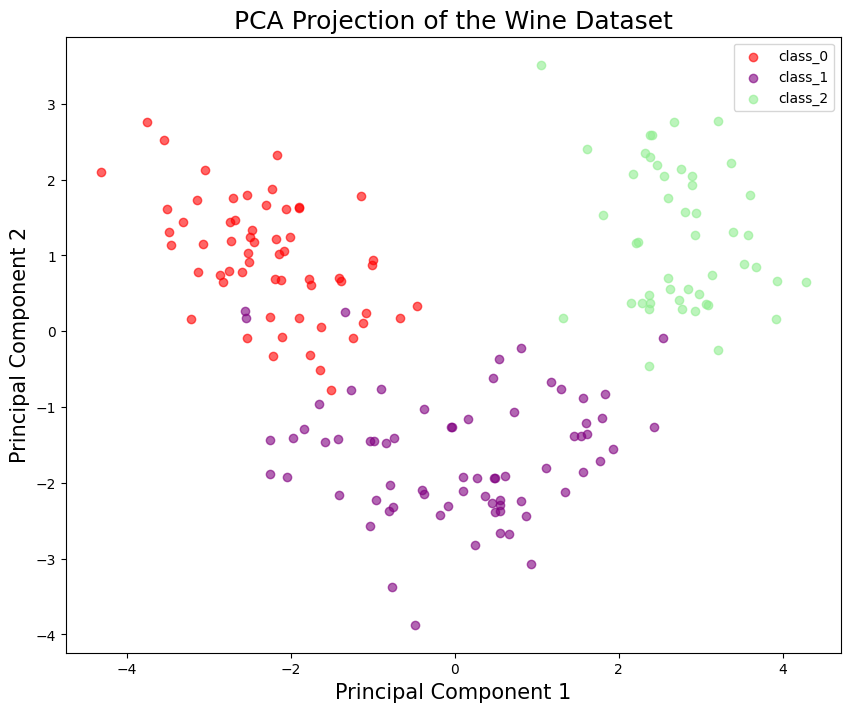

In [ ]:
plt.figure(figsize=(10, 8))
for wine_class, color, label in zip([0, 1, 2], ["red", "purple", "lightgreen"], labels):
    temp_df = pca_df[pca_df["Class"] == wine_class]
    plt.scatter(temp_df["PC1"], temp_df["PC2"], c=color, label=label, alpha=0.6)

plt.xlabel("Principal Component 1", fontsize=15)
plt.ylabel("Principal Component 2", fontsize=15)
plt.title("PCA Projection of the Wine Dataset", fontsize=18)
plt.legend()
plt.show()

The PCA projection of the wine dataset visualizes the data in a 2D space using the first two principal components.

If we do 3 components, it will capture more variance compared to two components, retaining more information from the original dataset.

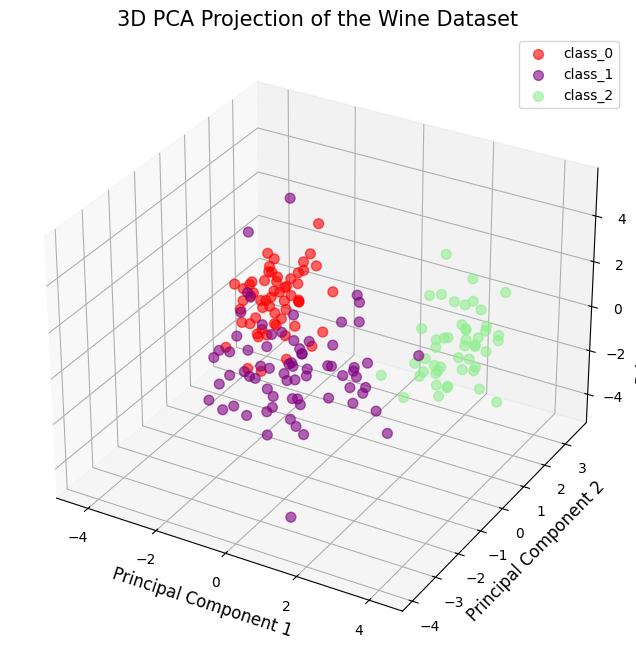

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

n = 3
selected_eigenvectors = eigenvectors[:, :n]

pca_transformed_data = np.dot(scaled_X, selected_eigenvectors)

pca_df = pd.DataFrame(pca_transformed_data, columns=["PC1", "PC2", "PC3"])
pca_df["Class"] = y

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors and labels for classes
colors = ["red", "purple", "lightgreen"]
labels = data.target_names

# Plot each wine class in 3D space
for wine_class, color, label in zip([0, 1, 2], colors, labels):
    temp_df = pca_df[pca_df["Class"] == wine_class]
    ax.scatter(
        temp_df["PC1"], temp_df["PC2"], temp_df["PC3"],
        c=color, label=label, s=50, alpha=0.6
    )

# Set axis labels and title
ax.set_xlabel("Principal Component 1", fontsize=12)
ax.set_ylabel("Principal Component 2", fontsize=12)
ax.set_zlabel("Principal Component 3", fontsize=12)
ax.set_title("3D PCA Projection of the Wine Dataset", fontsize=15)
ax.legend()
plt.show()

We can visualize the percentage of variance explained by each principal component.

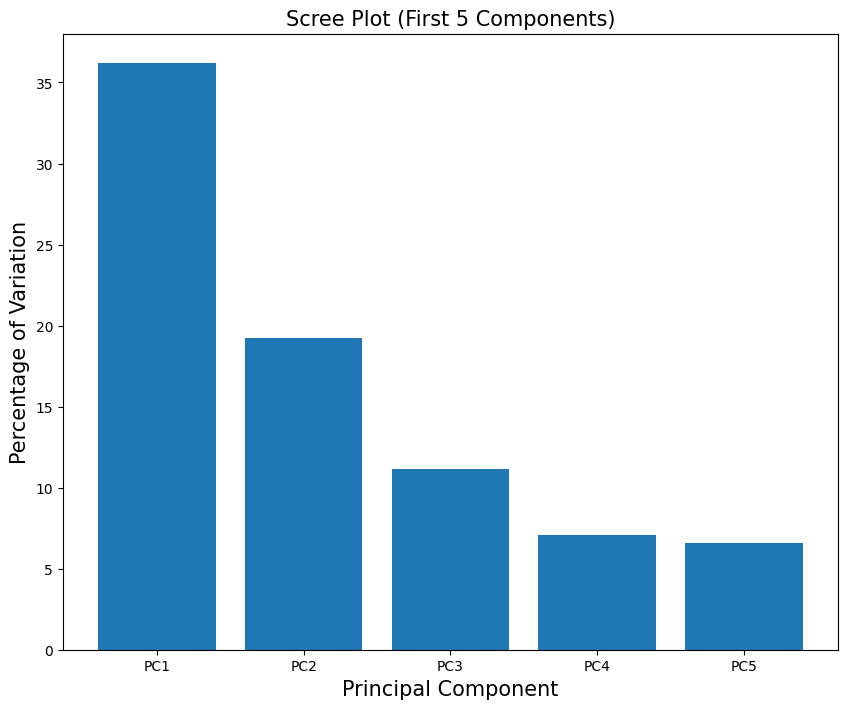

In [ ]:
total_variance = np.sum(eigenvalues)
per_var = [(eig / total_variance) * 100 for eig in eigenvalues]

# Generate labels for the principal components
labels = [f"PC{i}" for i in range(1, len(per_var) + 1)]

# Limit the number of components to display
num_components_to_show = 5

# Extract the top 4 components and their variances
top_per_var = per_var[:num_components_to_show]
top_labels = labels[:num_components_to_show]

plt.figure(figsize=(10, 8))
plt.bar(x=range(1, num_components_to_show + 1), height=top_per_var, tick_label=top_labels)
plt.xlabel('Principal Component', fontsize=15)
plt.ylabel('Percentage of Variation', fontsize=15)
plt.title('Scree Plot (First 5 Components)', fontsize=15)
plt.show()

From the graph, one can see that the most of the variance is captured from the first three components. The scree plot helps decide how many principal components should be retained for dimensionality reduction.

In [ ]:
coefficients_df = pd.DataFrame(
    eigenvectors[:, :len(eigenvalues)],
    columns=[f'PC{i+1}' for i in range(len(eigenvalues))],
    index=data.feature_names
)

print(coefficients_df.head())

                        PC1       PC2       PC3       PC4       PC5       PC6  \
alcohol           -0.144329  0.483652 -0.207383  0.017856 -0.265664  0.213539   
malic_acid         0.245188  0.224931  0.089013 -0.536890  0.035214  0.536814   
ash                0.002051  0.316069  0.626224  0.214176 -0.143025  0.154475   
alcalinity_of_ash  0.239320 -0.010591  0.612080 -0.060859  0.066103 -0.100825   
magnesium         -0.141992  0.299634  0.130757  0.351797  0.727049  0.038144   

                        PC7       PC8       PC9      PC10      PC11      PC12  \
alcohol            0.056396  0.396139 -0.508619  0.211605 -0.225917 -0.266286   
malic_acid        -0.420524  0.065827  0.075283 -0.309080  0.076486  0.121696   
ash                0.149171 -0.170260  0.307694 -0.027125 -0.498691 -0.049622   
alcalinity_of_ash  0.286969  0.427970 -0.200449  0.052799  0.479314 -0.055743   
magnesium         -0.322883 -0.156361 -0.271403  0.067870  0.071289  0.062220   

                       PC1

To verify our results, we will use the built in function in Python.

In [ ]:
from sklearn.decomposition import PCA

n_components = 3
pca = PCA(n_components=n_components)

pca.fit(scaled_X)
pca_data = pca.transform(scaled_X)

pca_data = pca.transform(scaled_X)

labels = [f"PC{i}" for i in range(1, n_components + 1)]  # Name principal components
pca_df = pd.DataFrame(pca_data, columns=labels)

print(pca_df.head())

PCA DataFrame:
        PC1       PC2       PC3
0  3.316751  1.443463 -0.165739
1  2.209465 -0.333393 -2.026457
2  2.516740  1.031151  0.982819
3  3.757066  2.756372 -0.176192
4  1.008908  0.869831  2.026688


In [ ]:
n_components = selected_eigenvectors.shape[1]  # Number of selected components
pc_names = [f"PC{i+1}" for i in range(n_components)]

pca_df = pd.DataFrame(pca_transformed_data, columns=pc_names)

# Add the original target labels to the DataFrame
pca_df['Label'] = y

print(pca_df.tail())

PCA-Transformed DataFrame:
          PC1       PC2       PC3  Label
173  3.370524  2.216289 -0.342570      2
174  2.601956  1.757229  0.207581      2
175  2.677839  2.760899 -0.940942      2
176  2.387017  2.297347 -0.550696      2
177  3.208758  2.768920  1.013914      2


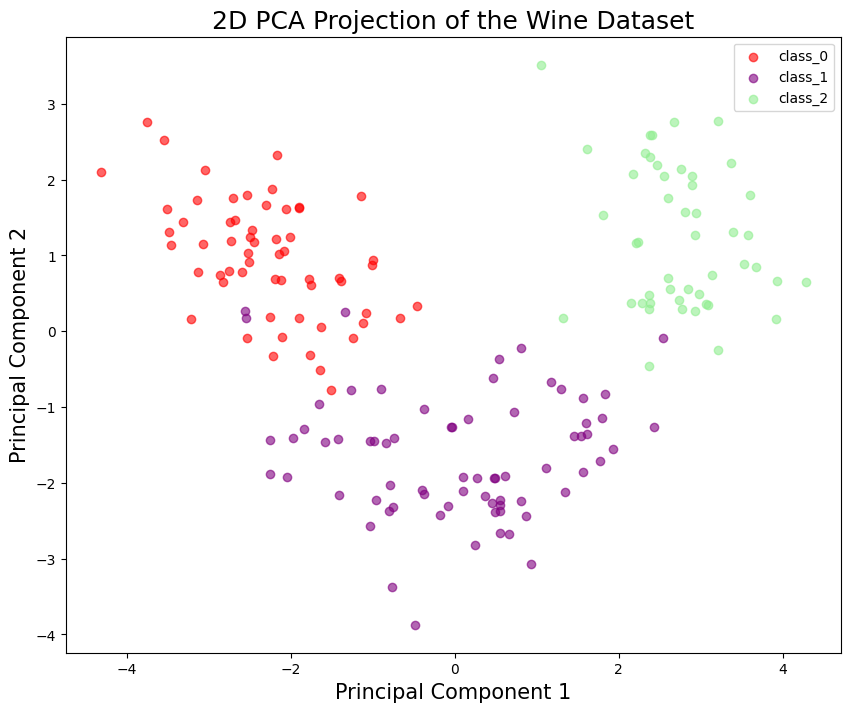

In [ ]:
# Define colors for labels
colors = ["red", "purple", "lightgreen"]
labels = data.target_names

# Create a 2D scatter plot
plt.figure(figsize=(10, 8))
for wine_class, color, label in zip([0, 1, 2], colors, labels):
    temp_df = pca_df[pca_df["Label"] == wine_class]
    plt.scatter(temp_df["PC1"], temp_df["PC2"], c=color, label=label, alpha=0.6)

plt.xlabel("Principal Component 1", fontsize=15)
plt.ylabel("Principal Component 2", fontsize=15)
plt.title("2D PCA Projection of the Wine Dataset", fontsize=18)
plt.legend()
plt.show()

Our PCA from scratch and Python's PCA function have the same output!